# 01. Neural Network Regression with Tensorflow

## Sub topics
* Architecture of a regression model
* Input shape and outupt shape
    * `X`: Features/data(inputs)
    * `Y`: labels (outputs)

* Creating custom data to view and fit
* Steps in modeling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating eveluation metrics
    * Filtting a model (getting it to find pattenns in our data)

* Eveluating a model
    * Visualizing the model
    * Looking at training curves
    * Compare predictions to ground truth(using the eveluatin metrics)

* Saving a model 
* Loading a model

## Typical architecture of regresion neural network

| **Hyperparameter** | **Typical Value**|
|--|--|
| Input layer shape | Same shape as number of features |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 - 100 |
| Output layer shape | Same shape as desired prediction shape |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

In [15]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"This notebook was last run on: {datetime.datetime.now()}")

2.17.0
This notebook was last run on: 2024-10-02 21:14:35.325241


## Creating data to view and fit

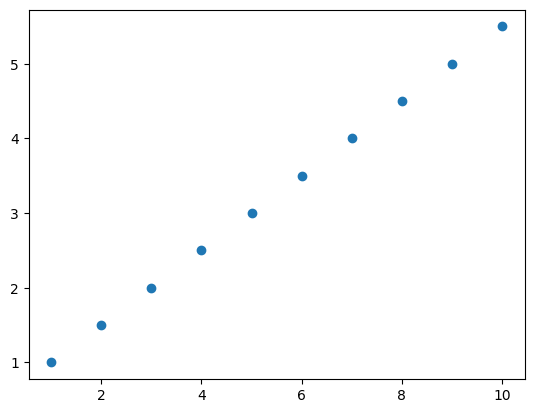

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
# Create labels
y = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], dtype=float)

# Visualize the data
plt.scatter(x, y);

## Regression input shapes and output shapes

* The `input shape` is the shape of the data that gose into the model.
* The `output shape` is the shape of data come out from the model.

In [17]:
# Example input and output shape of the regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([900000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([900000])>)

In [18]:
house_info.shape

TensorShape([3])

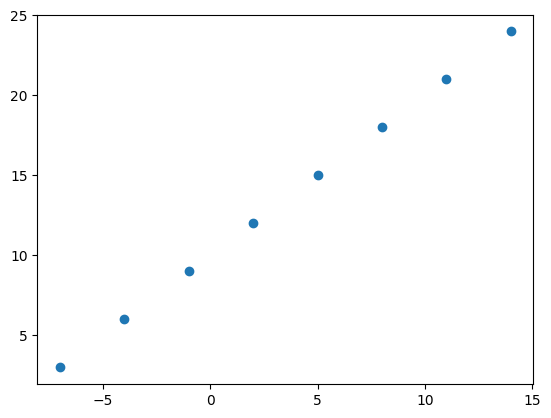

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=float)
# Create labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=float)

# Visualize the data
plt.scatter(x, y);

In [20]:
# Take a single example of x
input_shape = x[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # These are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [21]:
# Single examples invidually
x[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model
1. `Creating a model` - piece together the layers of neural network.
2. `Compilling a model` - defining how a models perfomaces should be measured.
3. `Fitting a model` - letting the model try to find patterns in the data.

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mea is short of mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short of stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x, axis=1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 11.8038 - mae: 11.8038
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.6713 - mae: 11.6713
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.5388 - mae: 11.5388
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.4063 - mae: 11.4063
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.2738 - mae: 11.2738


In [23]:
# Check out x, y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Make a prediction with the model
import numpy as np

# Convert the list to a NumPy array
input_data = np.array([17])

# Make a prediction with the model
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[11.263611]], dtype=float32)

## Improving a model

To improve model,
1. `Creating a model` - add more layers, increase the number of hidden units (also called neurons) withing each layer, change the activation functions of each layer.
2. `Compilling a model` - Choose opimization function or perhaps change the `learning rate` of the optimization function.
3. `Fitting a model` - Fit a model with more `epochs`.

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model ( Same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model (same as before)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - loss: 11.6587 - mae: 11.6587
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.5262 - mae: 11.5262
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.3937 - mae: 11.3937
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.2612 - mae: 11.2612
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1287 - mae: 11.1287
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.9962 - mae: 10.9962
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.8637 - mae: 10.8637
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7312 - mae: 10.7312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.5987 - mae: 10.5987
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.4662 - mae: 10.4662
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.3337 - mae: 10.3337
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.2012 - mae: 10.2012
Epoch 13/100
1/1 ━━━━━━━

In [26]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
# Make Prediction
#model.predict(input_data)
model.predict([17.0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[30.008598]], dtype=float32)